# Small image classification project

+ option 1 - work locally 
+ option 2 - work in google colab 


eg https://colab.research.google.com/drive/12HYIBBZl1gmqMYN98Rr3c-7kDUipS5LD

## first lets import tensor and keras and confirm versions

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.5.0'

In [3]:
keras.__version__

'2.5.0'

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd 
import numpy as np

## load and define data set

+ we will use MNIST, which is a famous/frequently used training db for images. 
+ This version Fashion MNIST includes 70000 grey scale images 28x28 px,10 classes, representing fashion items 
+ with keras you can load MNIST, Fashion MNIST, housing data set out of the box 

In [6]:
fashion=keras.datasets.fashion_mnist

In [7]:
(X_train_full, y_train_full),(X_test,y_test)=fashion.load_data()

+ Training data — used for training the model
+ Validation data — used for tuning the hyperparameters and evaluate the models (we will create this one)
+ Test data — used to test the model after the model has gone through initial vetting by the validation set.



## Explore the data set  

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

In [11]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

ValueError: num must be 1 <= num <= 12, not 0

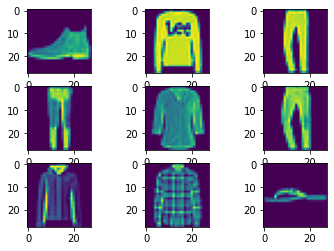

In [12]:
from matplotlib import pyplot
for i in range(10):
    pyplot.subplot(330+1+i)
    pyplot.imshow(X_test[i])
pyplot.show()

In [ ]:
pyplot.imshow(X_test[2413],cmap=pyplot.get_cmap('gray'))

## Create data validation set 

In [ ]:
X_valid, X_train=X_train_full[:5000]/255.0, X_train_full[5000:]
y_valid, y_train=y_train_full[:5000], y_train_full[5000:]


In [ ]:
X_train.shape

## Define the classes of the data set

In [ ]:
#we know there are 10 classes, but there are currently no labels in the data set (0-9) 
# as we need labels for the validation lets add them
# its a standard list which you can look up on the keras documentation and kaggle
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
#validate the classes using selected images from the data set (hint: index!)

class_names[y_test[2314]]

In [ ]:
y_test[2314] # its a index

In [ ]:
y_test[2313]

In [ ]:
y_test[223]

## Create the model (NN) - using the keras Sequential API - in this case a single stack of linear layers, connected sequentially 

In [ ]:
model = keras.models.Sequential() # create model
model.add(keras.layers.Flatten(input_shape=[28, 28])) #first layer - flattens each image into a 1d array (Pre-pr)
model.add(keras.layers.Dense(300, activation="relu")) # add a 300 neuron dense layer
model.add(keras.layers.Dense(100, activation="relu")) # add a second layer of neurons
model.add(keras.layers.Dense(10, activation="softmax")) # add a third layer of 10 neurons (one per class)

# note : dense layers often have tonnes of parameters ( first dense layer = 235500 p's)
# this adds flexibility, but risks overfit if training data not substantial /varied

### information about the layers 

Relu : 

In order to use stochastic gradient descent with backpropagation of errors to train deep neural networks, an activation function is needed that looks and acts like a linear function, but is, in fact, a nonlinear function allowing complex relationships in the data to be learned.

The function must also provide more sensitivity to the activation sum input and avoid easy saturation.

The rectified linear activation function is a simple calculation that returns the value provided as input directly, or the value 0.0 if the input is 0.0 or less. ie IF input > 0 return input, else 0 

The rectifier function mostly looks and acts like a linear activation function.

In general, a neural network is easier to optimize when its behavior is linear or close to linear.

Softmax : 
    
Recall that logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.

Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.

Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

### Compile the model

- optionally we can specify metrics for compute in training and evaluation stage

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", # we have few labels and they are exclusive (0-9, trousers/ankle boots)
optimizer="sgd", #using stochastic gradient descent to train model
metrics=["accuracy"]) # as its a classifer, we are interested in accuracy 


## Train and evaluate the model

In [ ]:
#create a history of the learning epochs (how many times run the cicle) which can be visualised later on 

history = model.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid))

**What are doing here?**

+ at each stage we can see the number of instances processed
+ the mean training time per sample
- plus the loss and accuracy or any other metrics requested in the last stage 


(your computer is likely working hard at this point!)
- note that for complex models, more CPU is needed than an average computer can supply

https://stackoverflow.com/questions/51704808/what-is-the-difference-between-loss-accuracy-validation-loss-validation-accur

In [ ]:
# we can even plot the learning curve 

pd.DataFrame(history.history).plot(figsize=(8, 5))
pyplot.grid(True)
pyplot.gca().set_ylim(0, 1) # set the vertical range to [0-1]
pyplot.show()
# IDEALLY training and validation accuracy increase, training and val loss steadily decrease 
# if you arent satisfied with model performance, go back and tune parameters - eg no of layers, neruons, activation fx, epochs, batch size

In [ ]:
# try other metrics for evaluation 


## Use model to make image predictions

In [ ]:
# testing dataset
X_testing=X_test[30:50]
y_prob=model.predict(X_testing)

In [ ]:
y_prob.round(5)
# how likely is the image to be n class or n other class


In [ ]:
y_pred=model.predict_classes(X_testing)
y_pred


In [ ]:
np.array(class_names)[y_pred]


In [ ]:
actual=y_test[30:50]


In [ ]:
np.array(class_names)[actual]

In [ ]:
pyplot.imshow(X_test[49],cmap=pyplot.get_cmap('gray'))

## What do you think of your image classification model ?

In [ ]:
# the images are very pixelated and hard to discern
